# Visualize `TedSim` hamming distance based costs

Application of `moslin` on `TedSim` simulations [[PHX-22]](https://doi.org/10.1093/nar/gkac235).


# Preliminaries

## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import utils_run
from utils_analysis import state_tree_draw, tree_draw, plot_cost, node_colors, _build_true_trees, _is_leaf
import lineageot.inference as lot_inf

import glob

import moscot as mc

In [3]:
mc.__version__

'0.3.4.dev158+gee31deb'

In [4]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

## Set up paths

Define the paths for data and figures

In [5]:
sys.path.insert(
    0, "../../../"
)  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, FIG_DIR

FIG_DIR = FIG_DIR / "simulations/pan_tedsim"
DATA_DIR = DATA_DIR / "simulations/pan_tedsim"
LOG_DIR = DATA_DIR / "simulations/pan_tedsim"

## Set global parameters

In [6]:
import mplscience

mplscience.set_style()
plt.rcParams["legend.scatterpoints"] = 1
plt.rcParams["figure.dpi"] = 300

# Visualize TedSim barcodes hamming distance


We can visualize the state tree the cells were sampled from

And the actual simulated tree.<br>
For the purpose of visualizations we focus only the early tree (up to depth 8 in the simulation).

In [7]:
p_a = 0.4
ss = 0.4
depth = 8
sample_times = {"early": 8 * 100, "late": 13 * 100}
data_seed = 30139
TTP = 100
scale_cost = "mean"
subsample = 0


ssrs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
edist_ssrs = {}
cluster_arrays_ssr = {}
for ssr in ssrs:
    true_trees, rna_arrays, pca_arrays, barcode_arrays, cluster_arrays, remove_late_cells = utils_run.prepare_data(
            DATA_DIR / f"adata_{p_a}_{ss}_{data_seed}.h5ad",
            depth=depth,
            ssr=ssr,
            pca=True,
            lognorm=True,
            n_pcs=30,
            ttp=TTP,
            subsample=subsample
        )
    cluster_arrays_ssr[ssr] = cluster_arrays["early"]
    edist_ssrs[ssr] = lot_inf.barcode_distances(barcode_arrays["early"])

Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].
Only considering the two last: ['.4_30139', '.h5ad'].


In [8]:
dfs_agg_ssr = {}
cluster_colors_ssr = {}
cluster_lut_ssr = {}
for (ssr, edist), cluster_array in zip(edist_ssrs.items(), cluster_arrays_ssr.values()):
    df = pd.DataFrame(edist_ssrs[ssr])
    df["cluster"] =  cluster_arrays_ssr[ssr]
    df = df.groupby(["cluster"]).mean().T
    df["cluster"] =  cluster_arrays_ssr[ssr]
    df = df.groupby(["cluster"]).mean().T
    dfs_agg_ssr[ssr] = df

    cluster_pal = sns.cubehelix_palette(np.unique(cluster_arrays_ssr[ssr]).size,
                                        light=.9, dark=.1, reverse=True,
                                        start=1, rot=-2)
    cluster_lut_ssr[ssr] = dict(zip(np.unique(cluster_arrays_ssr[ssr]), cluster_pal))
    
    cluster_colors_ssr[ssr] = pd.Series(cluster_arrays_ssr[ssr]).map(cluster_lut_ssr[ssr])

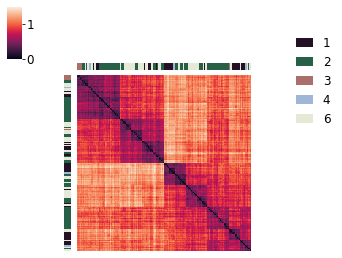

In [9]:
ssr = 0
g = sns.clustermap(
        edist_ssrs[ssr], 
        row_colors=cluster_colors_ssr[ssr].values, 
        col_colors=cluster_colors_ssr[ssr].values,
        row_cluster=False, 
        col_cluster=False,
        figsize=(4,4)
)

for label in np.unique(cluster_arrays_ssr[ssr]):
    g.ax_col_dendrogram.bar(0.0, 0.0, color=cluster_lut_ssr[ssr][label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(
    loc="upper left",
    ncol=1,
    bbox_to_anchor=(1.2, 0.2, 0.5, 0.5),
)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])


plt.savefig(
    FIG_DIR / 
    "ssr_ss0.4_pa0.4_ssr0.2_depth_8_barcodes_dist.pdf", bbox_inches="tight", dpi=300, format="pdf"
)

plt.show()

# References


[[PHX-22] Pan, X., Li, H., & Zhang, X. (2022). TedSim: temporal dynamics simulation of single-cell RNA sequencing data and cell division history. Nucleic Acids Research, 50(8), 4272-4288.](https://doi.org/10.1093/nar/gkac235)